In [3]:
!pip install scikit-learn


   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 3.0 MB/s eta 0:00:04
   --- ------------------------------------ 1.0/11.1 MB 3.0 MB/s eta 0:00:04
   ---- ----------------------------------- 1.3/11.1 MB 1.9 MB/s eta 0:00:06
   ----- ---------------------------------- 1.6/11.1 MB 1.6 MB/s eta 0:00:07
   ------ --------------------------------- 1.8/11.1 MB 1.5 MB/s eta 0:00:07
   ------- -------------------------------- 2.1/11.1 MB 1.5 MB/s eta 0:00:06
   -------- ------------------------------- 2.4/11.1 MB 1.5 MB/s eta 0:00:06
   ----------- ---------------------------- 3.1/11.1 MB 1.7 MB/s eta 0:00:05
   ------------ --------------------------- 3.4/11.1 MB 1.7 MB/s eta 0:00:05
   ------------- -------------------------- 3.7/11.1 MB 1.7 MB/s eta 0:00:05
   --------------- ------------------------ 4.2/11.1 MB 1.8 MB/s eta 0:00:04
   ----------

### import libraries

In [13]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt


### import the data frame

In [5]:
merged_data = pd.read_csv(r"C:\Users\Amani\Desktop\career foundry\Brazilian E-Commerce project A6\02 data\cleaned data\merged_data.csv")


In [7]:
merged_data.columns

Index(['order_id', 'customer_id', 'order_status',
       'order_estimated_delivery_date', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_category_name',
       'product_category_name_english', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'geolocation_zip_code_prefix_customer',
       'geolocation_city_customer', 'geolocation_state_customer',
       'geolocation_lat_customer', 'geolocation_lng_customer',
       'geolocation_zip_code_prefix_seller', 'geolocation_city_seller',
       'geolocation_state_seller', 'geolocation_lat_seller',
       'geolocation_lng_seller'],
      dtype='object')

In [8]:
merged_data.head()


,order_id,customer_id,order_status,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,...,geolocation_zip_code_prefix_customer,geolocation_city_customer,geolocation_state_customer,geolocation_lat_customer,geolocation_lng_customer,geolocation_zip_code_prefix_seller,geolocation_city_seller,geolocation_state_seller,geolocation_lat_seller,geolocation_lng_seller
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,18/10/2017,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,...,3149.0,sao paulo,SP,"-2,36E+15","-4,66E+16",9350.0,maua,SP,"-2,37E+15","-4,65E+14"
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,18/10/2017,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,...,3149.0,sao paulo,SP,"-2,36E+15","-4,66E+16",9350.0,maua,SP,"-2,37E+16","-4,64E+15"
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,18/10/2017,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,...,3149.0,sao paulo,SP,"-2,36E+15","-4,66E+16",9350.0,mauA!,SP,"-2,37E+16","-4,64E+15"
3,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,18/10/2017,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,...,3149.0,sao paulo,SP,"-2,36E+15","-4,66E+16",9350.0,maua,SP,"-2,37E+15","-4,64E+15"
4,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,18/10/2017,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,...,3149.0,sao paulo,SP,"-2,36E+15","-4,66E+16",9350.0,maua,SP,"-2,37E+13","-4,64E+15"


### data cleaning

In [9]:
# Check for missing values
merged_data.isnull().sum()

order_id                                     0
customer_id                                  0
order_status                                 0
order_estimated_delivery_date                0
customer_unique_id                           0
customer_zip_code_prefix                     0
customer_city                                0
customer_state                               0
order_item_id                                0
product_id                                   0
seller_id                                    0
shipping_limit_date                          0
price                                        0
freight_value                                0
payment_sequential                         567
payment_type                               567
payment_installments                       567
payment_value                              567
product_category_name                   258378
product_category_name_english           261705
seller_zip_code_prefix                       0
seller_city  

In [27]:
# Drop rows with missing values as the data set is very large and this will not effect
merged_data = merged_data.dropna()

In [11]:
merged_data.isnull().sum()

order_id                                0
customer_id                             0
order_status                            0
order_estimated_delivery_date           0
customer_unique_id                      0
customer_zip_code_prefix                0
customer_city                           0
customer_state                          0
order_item_id                           0
product_id                              0
seller_id                               0
shipping_limit_date                     0
price                                   0
freight_value                           0
payment_sequential                      0
payment_type                            0
payment_installments                    0
payment_value                           0
product_category_name                   0
product_category_name_english           0
seller_zip_code_prefix                  0
seller_city                             0
seller_state                            0
geolocation_zip_code_prefix_custom

#### explor ralations between variables again

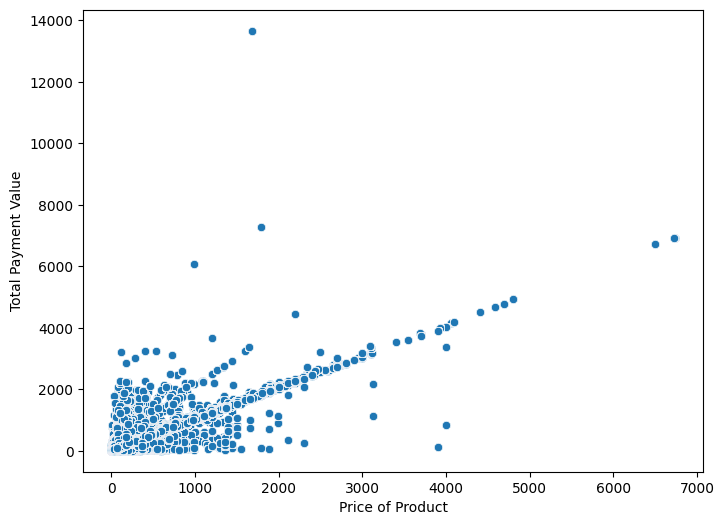

In [14]:

# Visualizing the relationship between price and payment_value
plt.figure(figsize=(8, 6))
sns.scatterplot(x=merged_data['price'], y=merged_data['payment_value'])
plt.xlabel("Price of Product")
plt.ylabel("Total Payment Value")
plt.show()


##### Hypothesis: There is a linear relationship between the price of a product and the total payment value. As the price of a product increases, the total payment value should also increase

In [16]:
# Define the independent variable (X) and dependent variable (y)
X = merged_data[['price']].values  # Predictor variable (must be 2D for sklearn)
y = merged_data['payment_value'].values  # Target variable


In [17]:
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Create the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [19]:
# Predict y values using the test data
y_pred = model.predict(X_test)


C:\Users\Amani\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


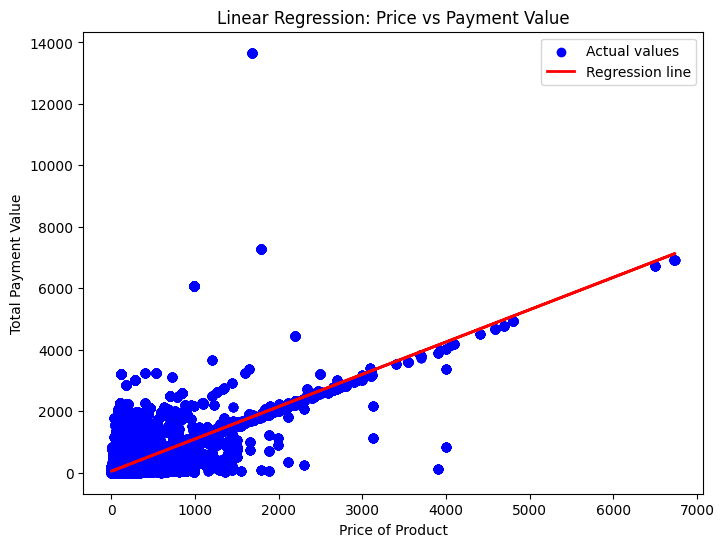

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color="blue", label="Actual values")  # النقاط الفعلية
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Regression line")  # خط الانحدار
plt.xlabel("Price of Product")
plt.ylabel("Total Payment Value")
plt.title("Linear Regression: Price vs Payment Value")
plt.legend()
plt.show()


In [25]:
#Model Performance Evaluation
# 1. Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")


Mean Squared Error (MSE): 25588.83


In [22]:
# 2. Calculate (R² Score)
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.2f}")


R² Score: 0.58


In [23]:
# Create a DataFrame to compare actual vs predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison_df.head())


   Actual   Predicted
0   87.58  119.748519
1  465.42  110.177784
2   66.47  100.712222
3  802.48  869.894300
4   34.17   74.418994


#### comments and insights:
 Performance Evaluation Using Statistical Metrics
MSE (Mean Squared Error) = 25,588.83

This value represents the average squared difference between actual and predicted values.
A lower MSE indicates a more accurate model.
Here, the value is quite high, meaning there are significant errors in the predictions.
R² Score = 0.58

This metric explains how much of the variance in payment_value can be explained by payment_installments.
General interpretation of R²:

If R² ≈ 1 → Excellent model, strong explanatory power.

If R² > 0.7 → Good model.

If R² between 0.5 and 0.7 → Moderate performance.

If R² < 0.5 → Weak model.

Here, R² = 0.58, meaning the model explains 58% of the variance, indicating a moderate fit but not an ideal one.

#### Positive Aspects:
The model captures some general trends in the data. Some predictions are reasonably close to actual values, such as:
802.48 (Actual) vs. 869.89 (Predicted) → Good prediction.
34.17 (Actual) vs. 74.42 (Predicted) → There is a difference, but not extreme.
#### Negative Aspects:
Some large errors exist, such as:

465.42 (Actual) vs. 110.18 (Predicted) → Major error, showing the model struggles in some cases.

87.58 (Actual) vs. 119.75 (Predicted) → Moderate error, but still noticeable.

#### How to Improve the Model?
##### Add More Variables

payment_installments alone may not be enough to predict payment_value.
Adding more features like price and payment_type could improve the model.
Use More Advanced Models

##### Try Multiple Regression instead of simple linear regression.
##### Analyze Data More Deeply

##### Outliers may be affecting the model.
##### Removing extreme values could improve accuracy.